In [197]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import ta
from ta.volatility import BollingerBands

In [234]:
data = yf.download(
    "SPY",
    start="1990-01-01",
    end="2021-01-01",
    auto_adjust = True,
    group_by="Ticker",
)

[*********************100%***********************]  1 of 1 completed


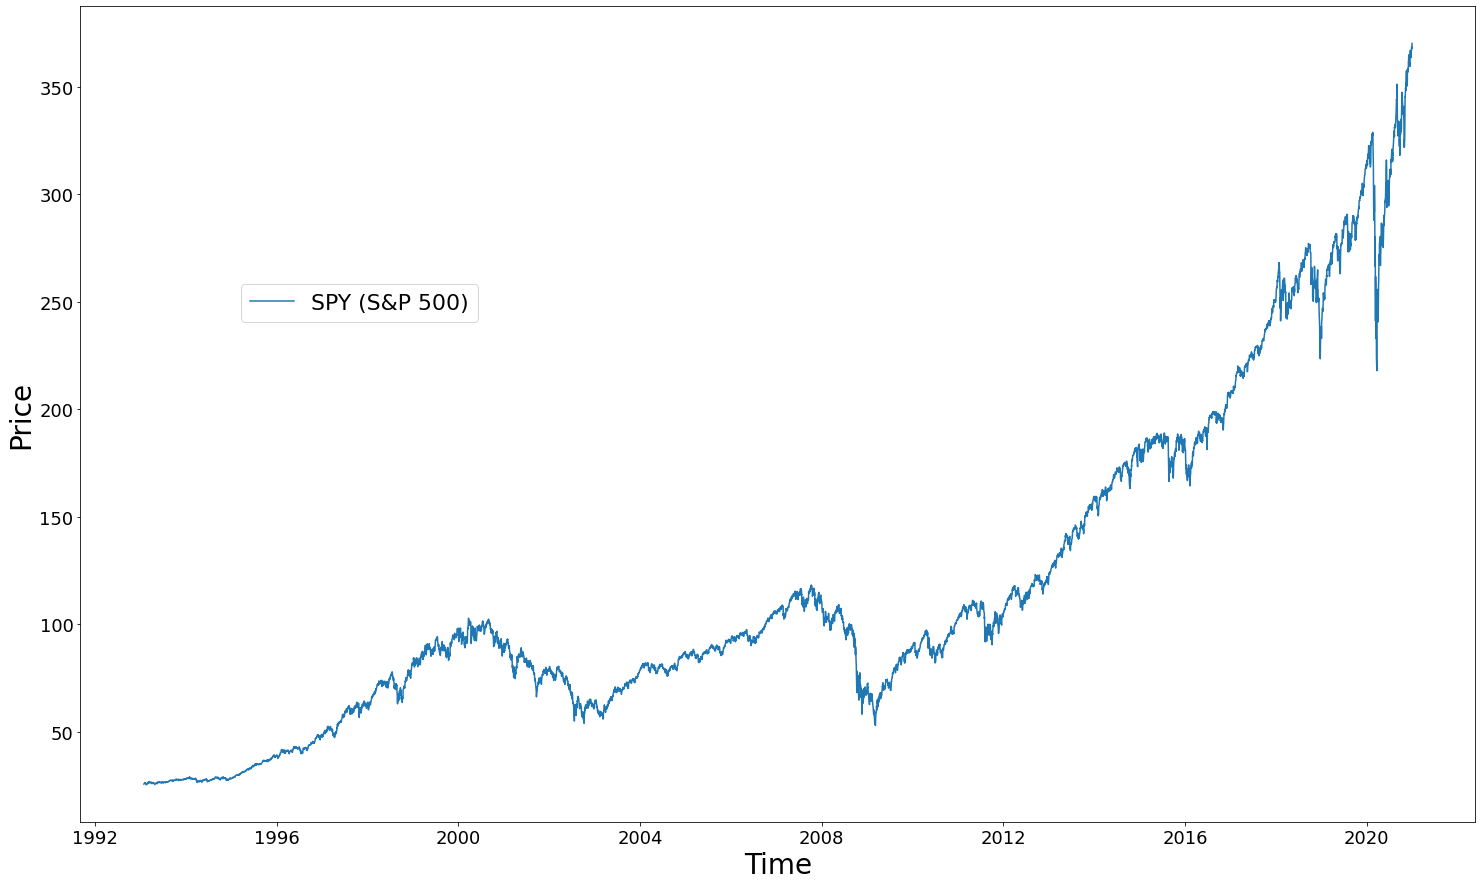

In [235]:
plt.figure(figsize=(25,15))

plt.plot(data['Close'], label='SPY (S&P 500)')

plt.legend(loc='lower center', bbox_to_anchor=(0.2, 0.6), fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time', fontsize=28)
plt.ylabel('Price', fontsize=28)

plt.show()

In [236]:
def setlabel(row):
    if row['next_diff_curr'] > 0:
        return 1
    elif row['next_diff_curr'] < 0:
        return -1
    else:
        return 0

In [237]:
processed = data
processed['next_diff_curr'] = processed['Close'].shift(-1) - processed['Close']
processed['label'] = processed.apply(setlabel, axis=1)

In [238]:
processed['label'].value_counts()

 1    3797
-1    3175
 0      61
Name: label, dtype: int64

In [239]:
df = ta.utils.dropna(data)
df = ta.add_all_ta_features(df, "Open", "High", "Low", "Close", "Volume", fillna=True)

df['next_diff_curr'] = df['Close'] - df['Close'].shift(-1)
df['label'] = df.apply(setlabel, axis=1)

/Users/qingweilan/.pyenv/versions/3.8.12/lib/python3.8/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/Users/qingweilan/.pyenv/versions/3.8.12/lib/python3.8/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


In [240]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'next_diff_curr', 'label',
       'volume_adi', 'volume_obv', 'volume_cmf', 'volume_fi', 'volume_mfi',
       'volume_em', 'volume_sma_em', 'volume_vpt', 'volume_nvi', 'volume_vwap',
       'volatility_atr', 'volatility_bbm', 'volatility_bbh', 'volatility_bbl',
       'volatility_bbw', 'volatility_bbp', 'volatility_bbhi',
       'volatility_bbli', 'volatility_kcc', 'volatility_kch', 'volatility_kcl',
       'volatility_kcw', 'volatility_kcp', 'volatility_kchi',
       'volatility_kcli', 'volatility_dcl', 'volatility_dch', 'volatility_dcm',
       'volatility_dcw', 'volatility_dcp', 'volatility_ui', 'trend_macd',
       'trend_macd_signal', 'trend_macd_diff', 'trend_sma_fast',
       'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow', 'trend_adx',
       'trend_adx_pos', 'trend_adx_neg', 'trend_vortex_ind_pos',
       'trend_vortex_ind_neg', 'trend_vortex_ind_diff', 'trend_trix',
       'trend_mass_index', 'trend_cci', 'trend_dpo', 'tre

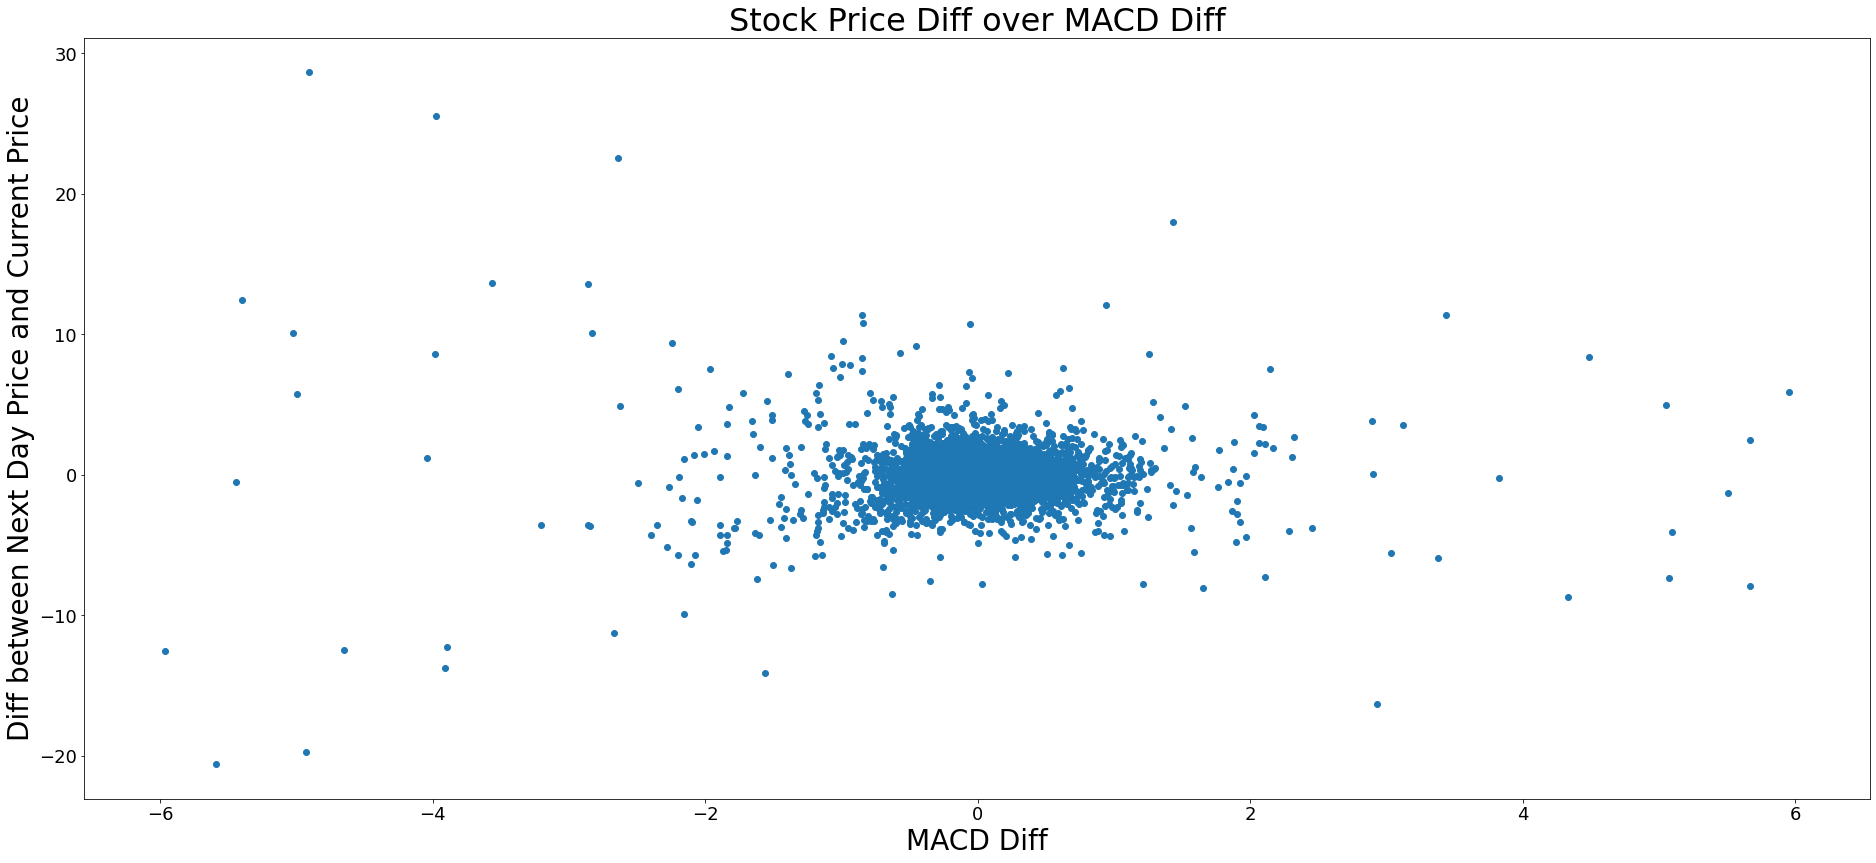

In [244]:
plt.figure(figsize=(32,14))

plt.scatter(df['trend_macd_diff'], df['next_diff_curr'])

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('MACD Diff', fontsize=28)
plt.ylabel('Diff between Next Day Price and Current Price', fontsize=28)

plt.title('Stock Price Diff over MACD Diff', fontsize=32)

plt.show()

In [152]:
ydays = 252
start = ydays * 18
end = start + ydays

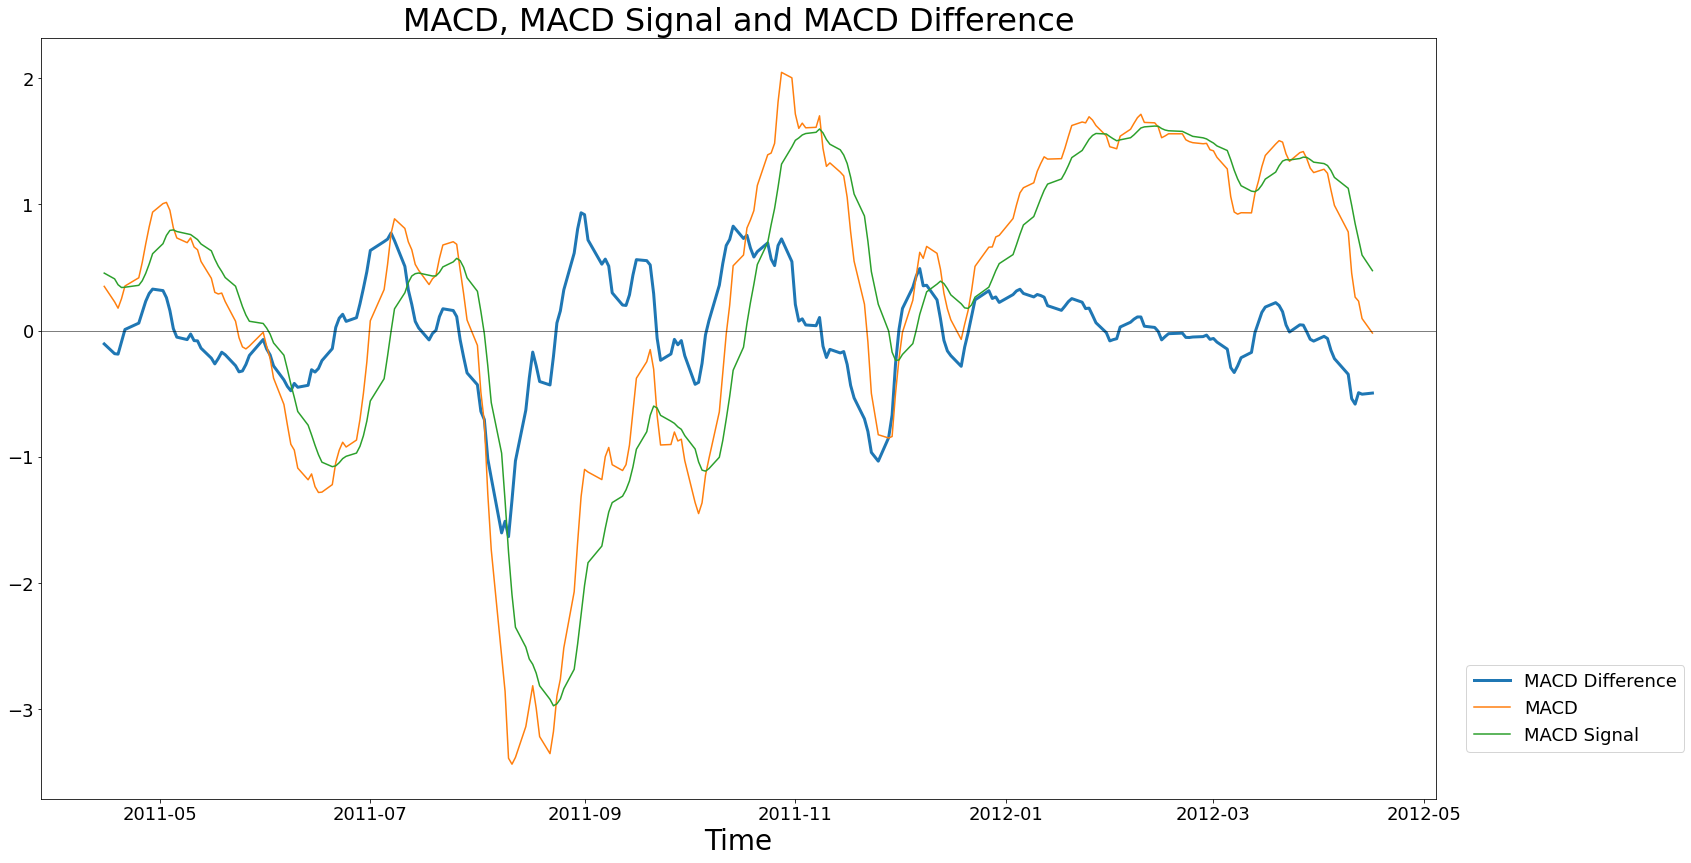

In [195]:
plt.figure(figsize=(25,14))

plt.plot(df[start:end]['trend_macd_diff'], label='MACD Difference', linewidth=3)
plt.plot(df[start:end]['trend_macd'], label='MACD')
plt.plot(df[start:end]['trend_macd_signal'], label='MACD Signal')

plt.legend(loc='lower center', bbox_to_anchor=(1.1, 0.05), fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time', fontsize=28)

plt.axhline(0, color='black', linewidth=0.5)

plt.title('MACD, MACD Signal and MACD Difference', fontsize=32)

plt.show()

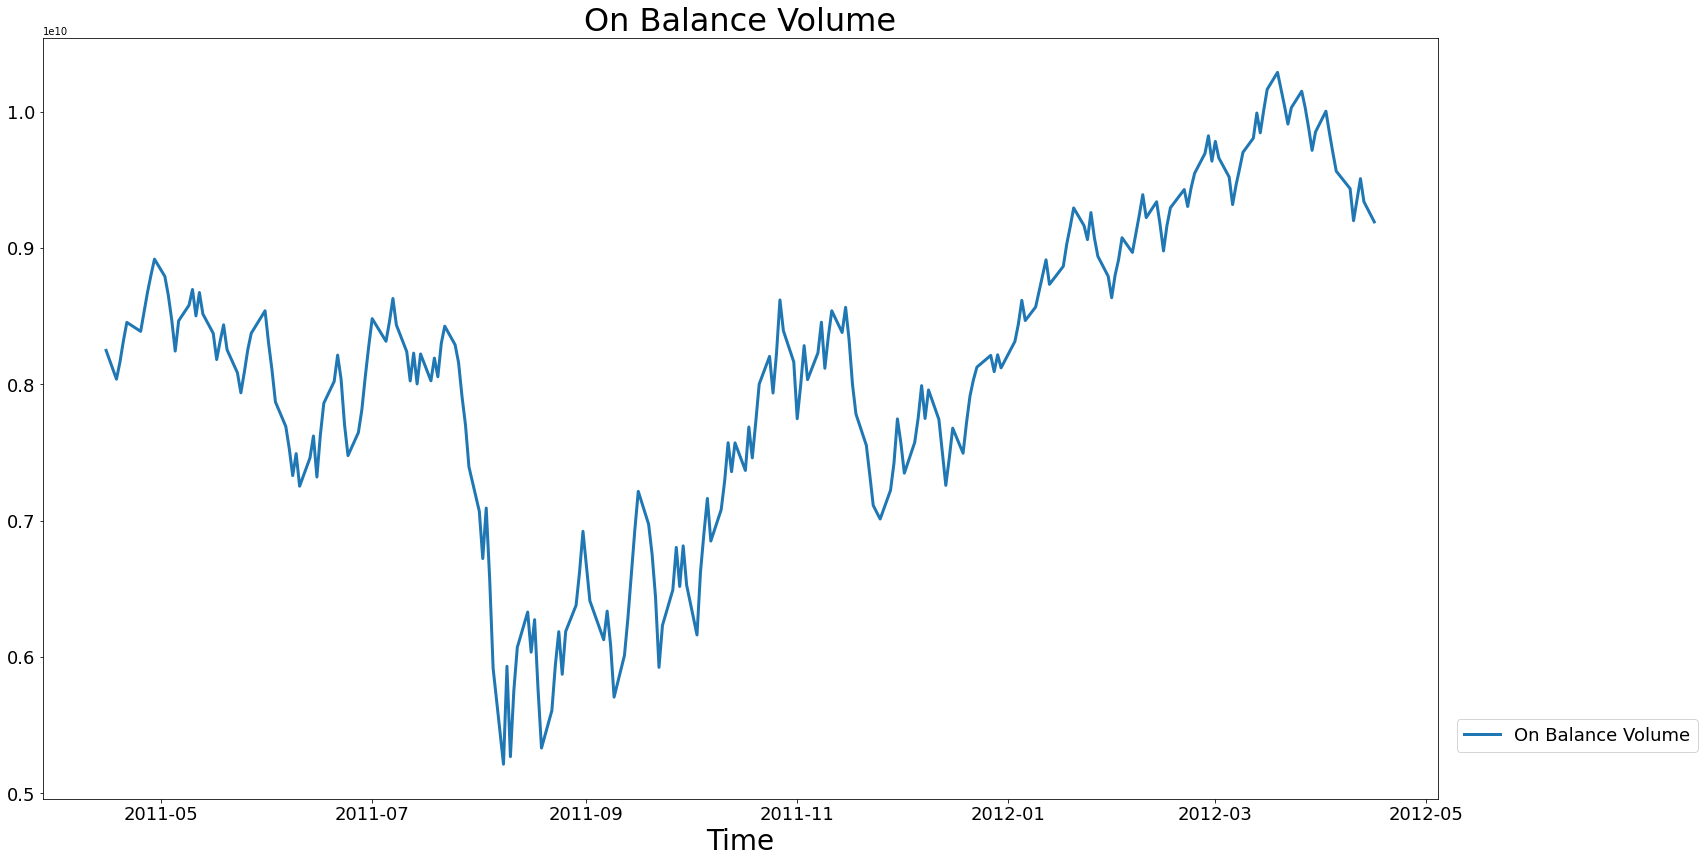

In [212]:
plt.figure(figsize=(25,14))

plt.plot(df[start:end]['volume_obv'], label='On Balance Volume', linewidth=3)

plt.legend(loc='lower center', bbox_to_anchor=(1.1, 0.05), fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time', fontsize=28)

plt.title('On Balance Volume', fontsize=32)

plt.show()

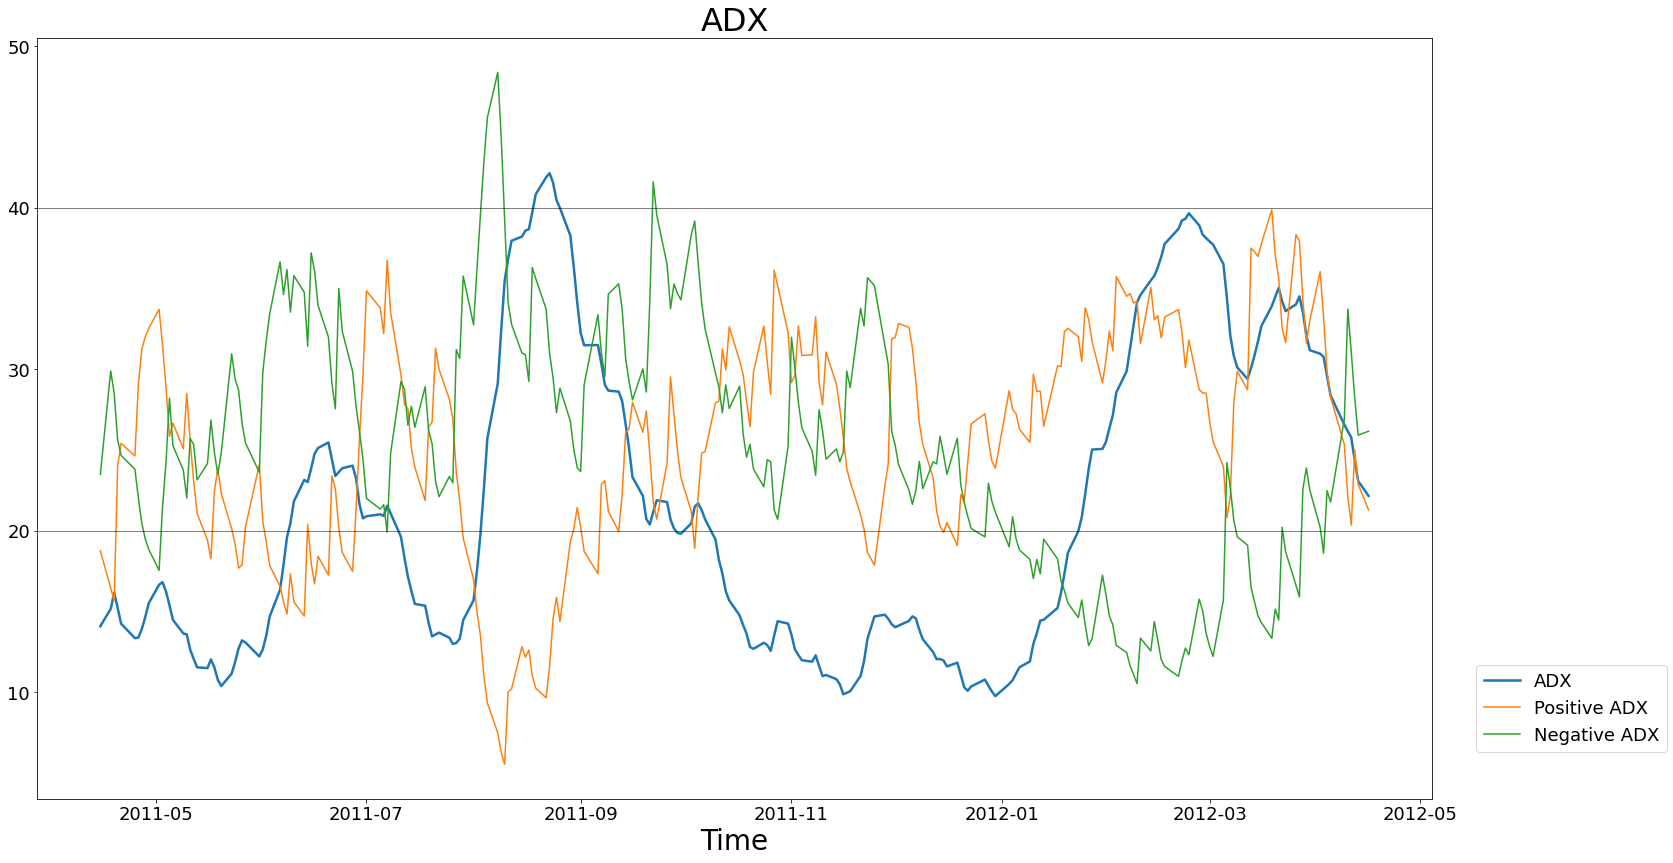

In [211]:
plt.figure(figsize=(25,14))

plt.plot(df[start:end]['trend_adx'], label='ADX', linewidth=2.5)
plt.plot(df[start:end]['trend_adx_pos'], label='Positive ADX')
plt.plot(df[start:end]['trend_adx_neg'], label='Negative ADX')

plt.legend(loc='lower center', bbox_to_anchor=(1.1, 0.05), fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time', fontsize=28)

plt.axhline(40, color='black', linewidth=0.5)
plt.axhline(20, color='black', linewidth=0.5)

plt.title('ADX', fontsize=32)

plt.show()

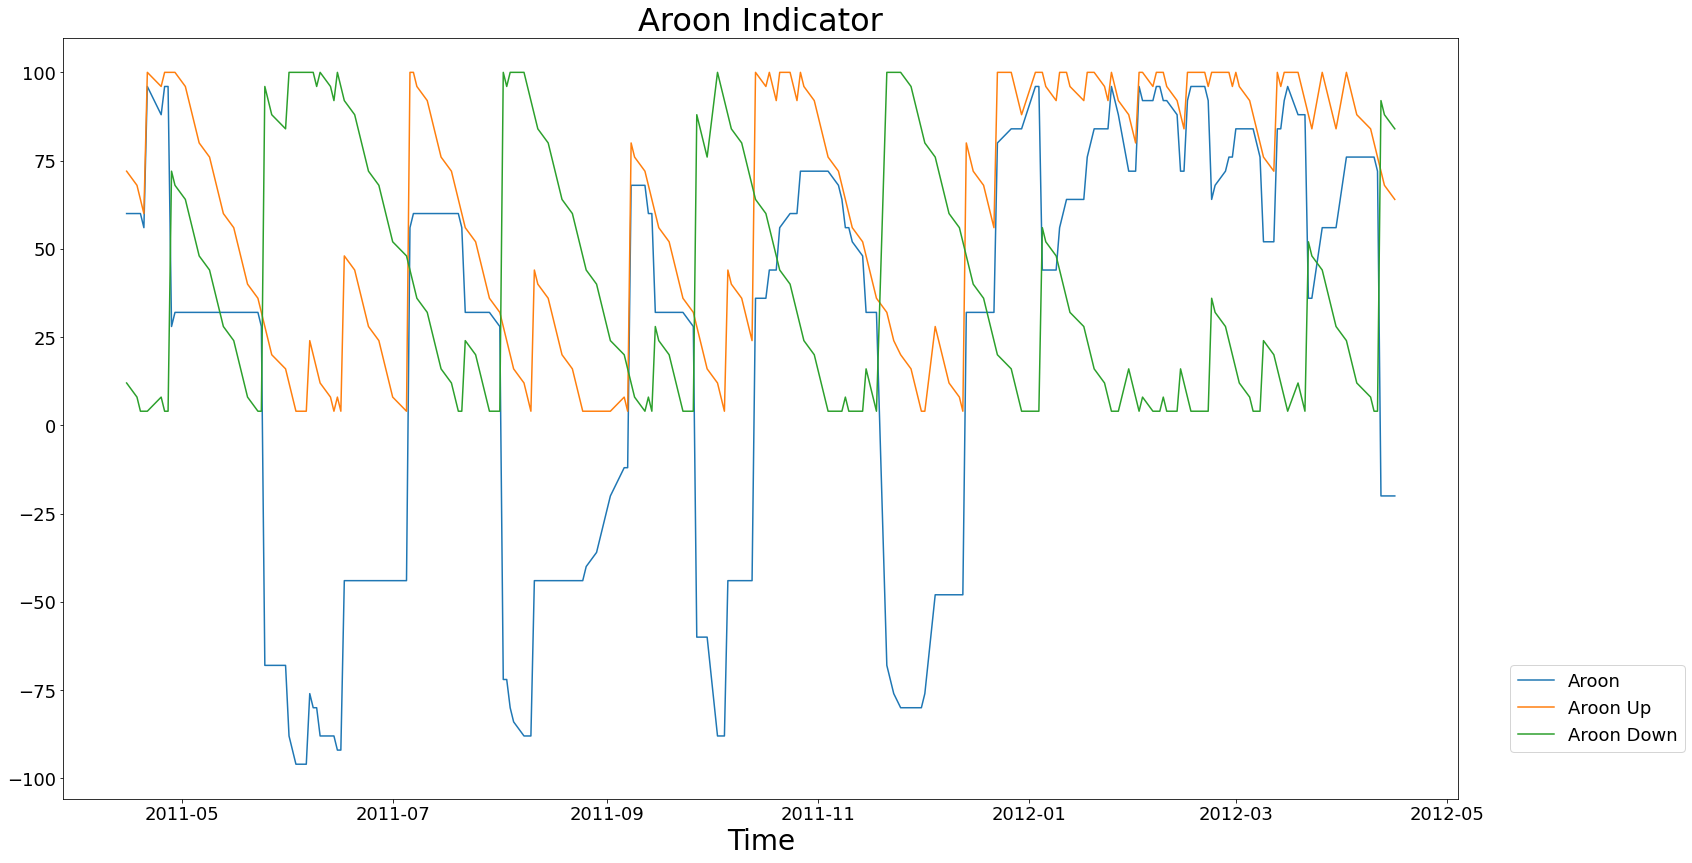

In [187]:
plt.figure(figsize=(25,14))

plt.plot(df[start:end]['trend_aroon_ind'], label='Aroon')
plt.plot(df[start:end]['trend_aroon_up'], label='Aroon Up')
plt.plot(df[start:end]['trend_aroon_down'], label='Aroon Down')

plt.legend(loc='lower center', bbox_to_anchor=(1.1, 0.05), fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time', fontsize=28)

plt.title('Aroon Indicator', fontsize=32)

plt.show()

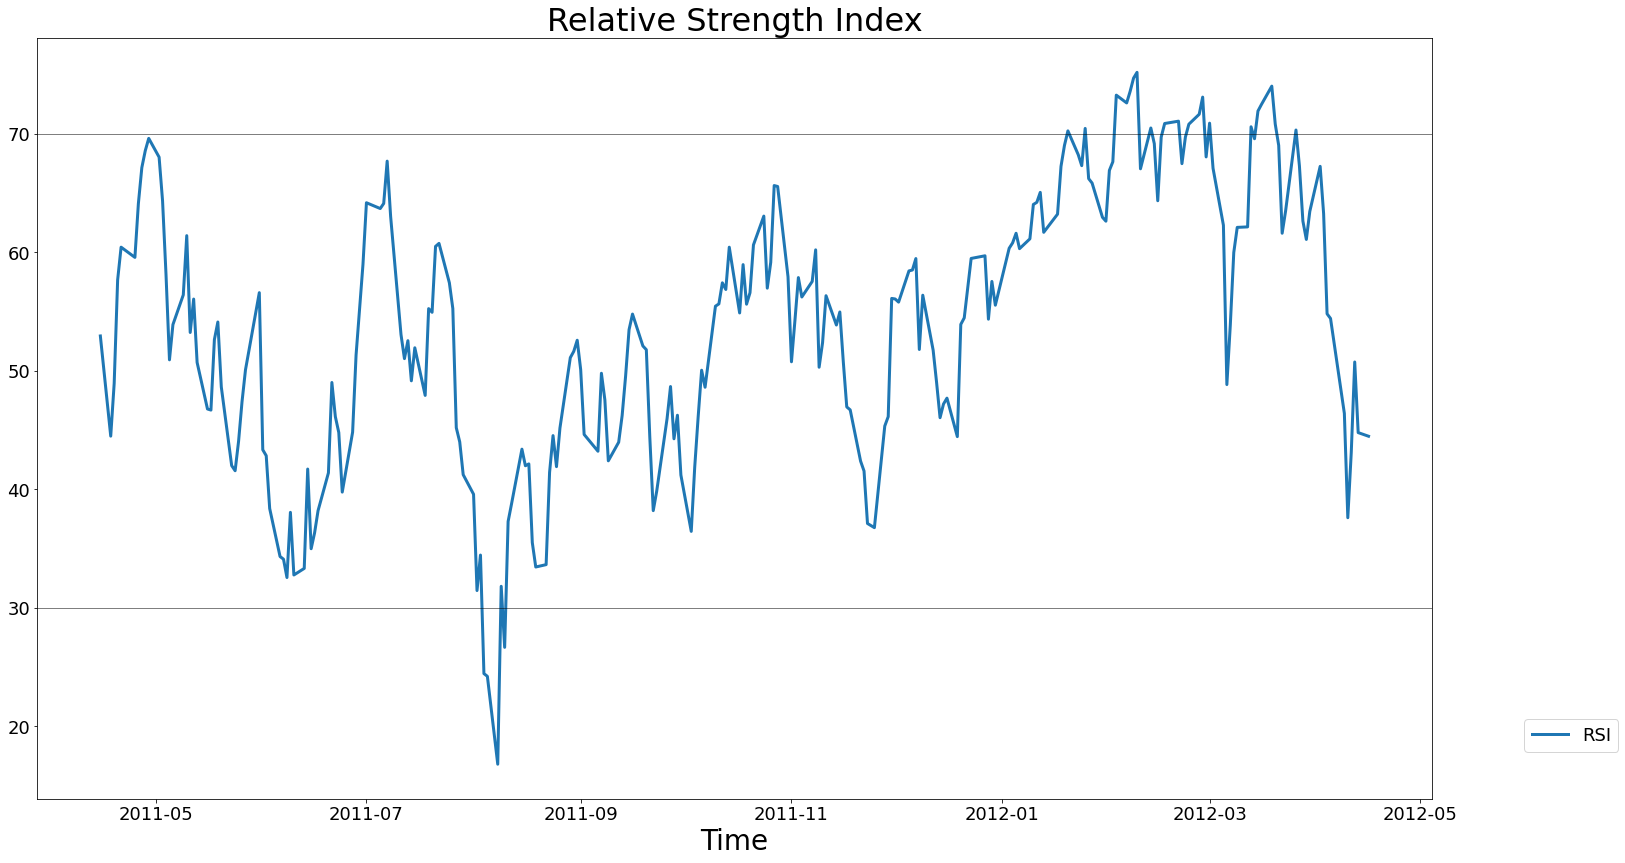

In [213]:
plt.figure(figsize=(25,14))

plt.plot(df[start:end]['momentum_rsi'], label='RSI', linewidth=3)

plt.legend(loc='lower center', bbox_to_anchor=(1.1, 0.05), fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time', fontsize=28)

plt.axhline(30, color='black', linewidth=0.5)
plt.axhline(70, color='black', linewidth=0.5)

plt.title('Relative Strength Index', fontsize=32)

plt.show()

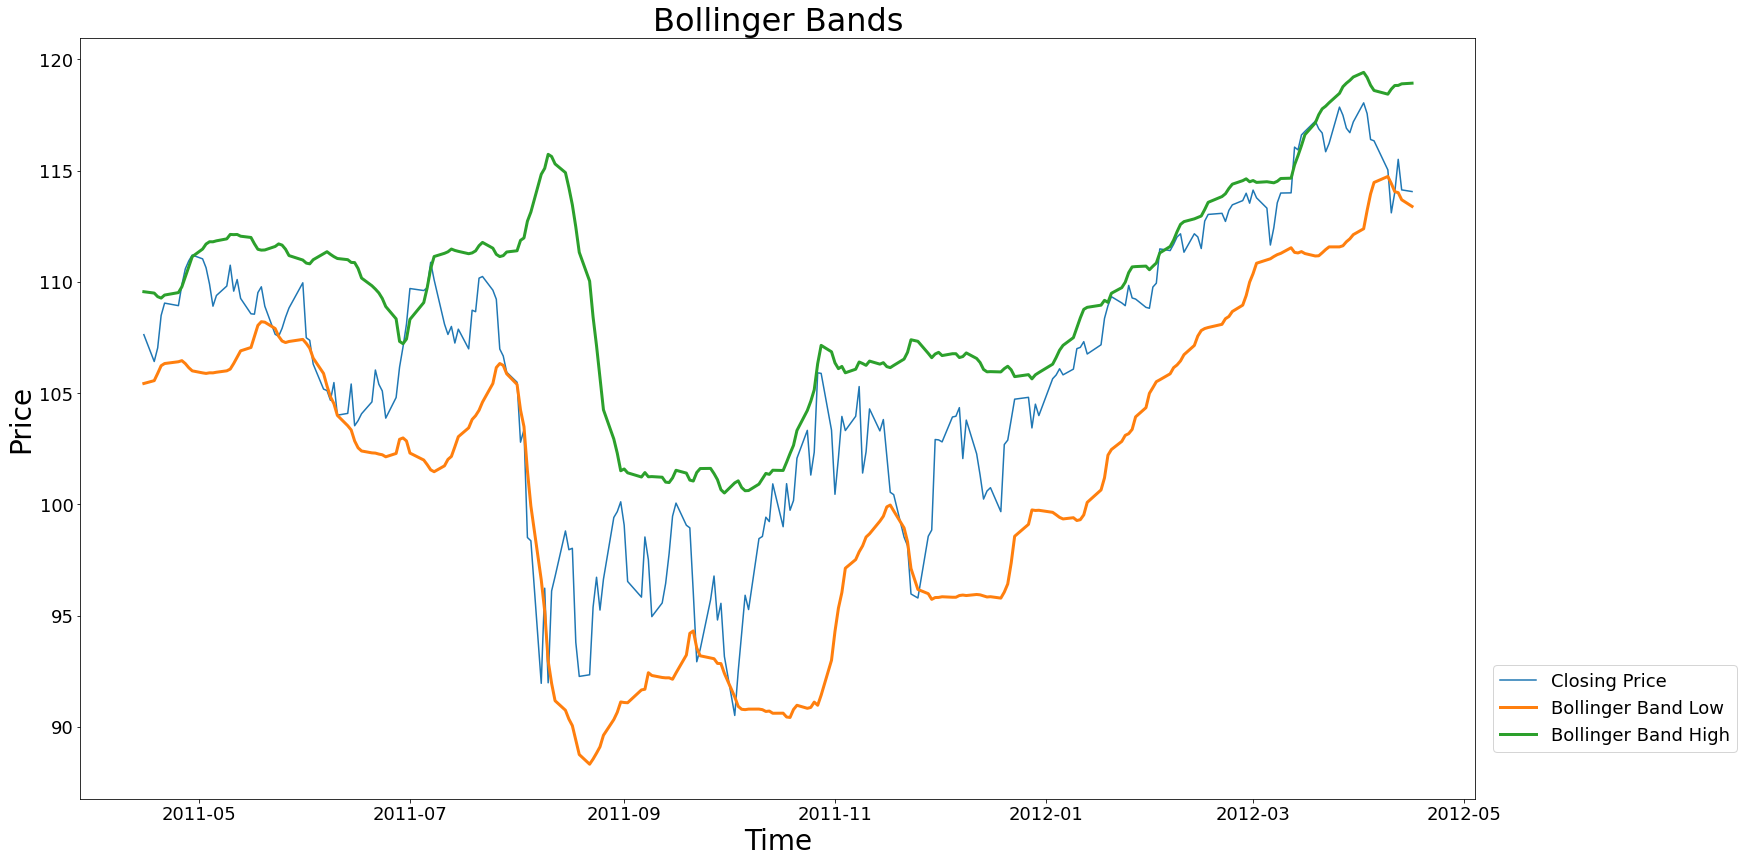

In [210]:
plt.figure(figsize=(25,14))

plt.plot(df[start:end]['Close'], label='Closing Price')
plt.plot(df[start:end]['volatility_bbl'], label='Bollinger Band Low', linewidth=3)
plt.plot(df[start:end]['volatility_bbh'], label='Bollinger Band High', linewidth=3)

plt.legend(loc='lower center', bbox_to_anchor=(1.1, 0.05), fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time', fontsize=28)
plt.ylabel('Price', fontsize=28)

plt.title('Bollinger Bands', fontsize=32)

plt.show()

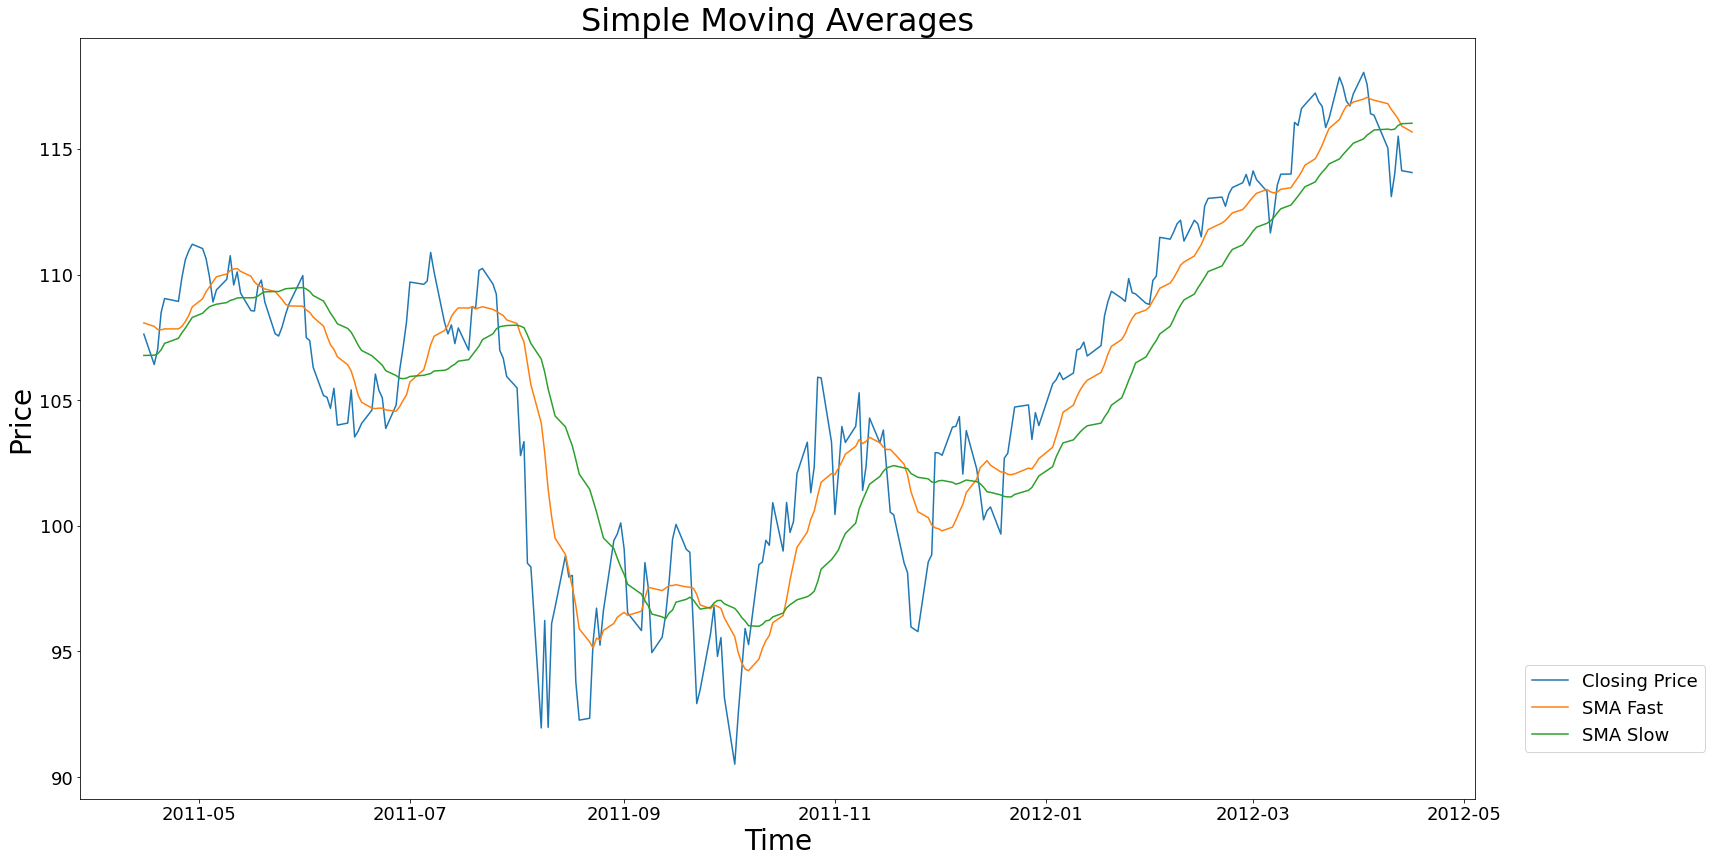

In [209]:
plt.figure(figsize=(25,14))

plt.plot(df[start:end]['Close'], label='Closing Price')
plt.plot(df[start:end]['trend_sma_fast'], label='SMA Fast')
plt.plot(df[start:end]['trend_sma_slow'], label='SMA Slow')

plt.legend(loc='lower center', bbox_to_anchor=(1.1, 0.05), fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time', fontsize=28)
plt.ylabel('Price', fontsize=28)

plt.title('Simple Moving Averages', fontsize=32)

plt.show()